In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score as ps
from sklearn.metrics import recall_score as rs
from sklearn.metrics import f1_score as f1s
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv('titanic.csv')
data

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,111369,30.0000,C148,C,1


<AxesSubplot: xlabel='Survived', ylabel='count'>

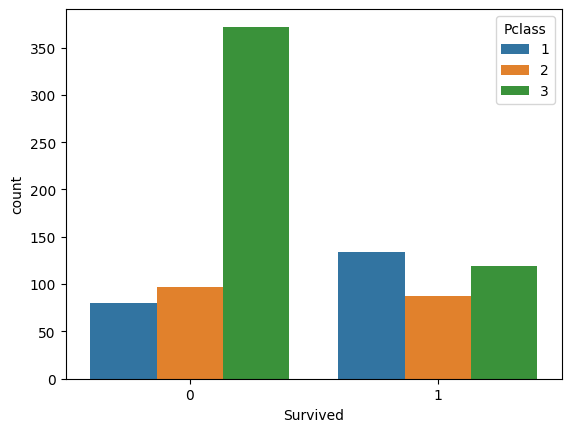

In [46]:
#here visualizing passengerid and names with survived will not make any sense because these are unique identities
data.isnull().sum()
data.drop(['Name','PassengerId','Ticket','Cabin'],axis=1,inplace=True)
data.dropna(subset=['Embarked'],inplace = True)
data['Age'].fillna(data.Age.mean(),inplace=True)
import seaborn as sns
sns.countplot(data=data,x='Survived',hue='Pclass')

#here we can clearly see that class 3 %save was least


<AxesSubplot: xlabel='Survived', ylabel='count'>

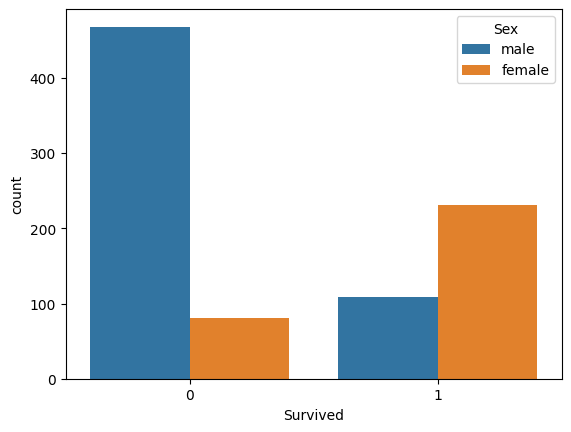

In [47]:
sns.countplot(data=data,x='Survived',hue='Sex')
#here we can see that male sex was least saved

<AxesSubplot: xlabel='Survived', ylabel='Age'>

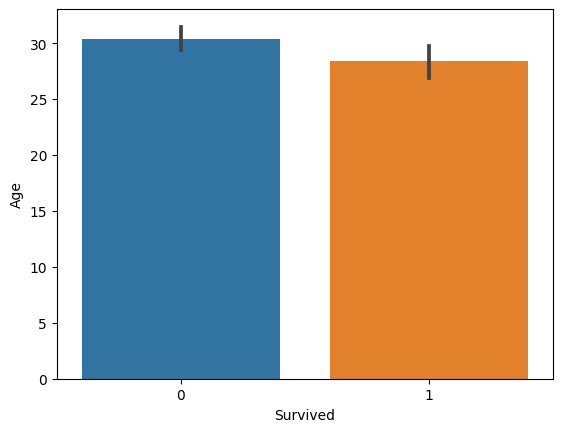

In [48]:
#plotting between two columns
import matplotlib.pyplot as plt
sns.barplot(data=data,x='Survived',y='Age')





<AxesSubplot: xlabel='Survived', ylabel='Fare'>

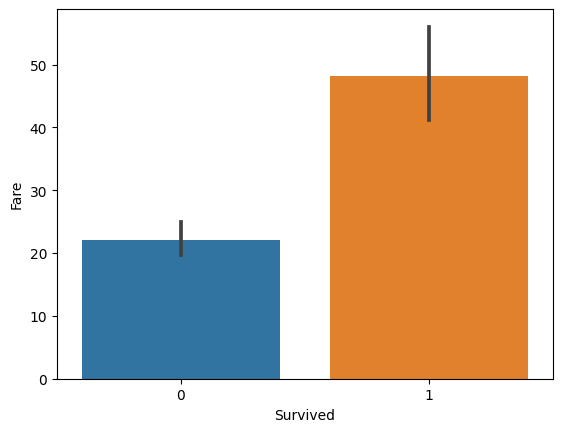

In [49]:
sns.barplot(data=data,x='Survived',y='Fare')

<AxesSubplot: xlabel='Fare', ylabel='Age'>

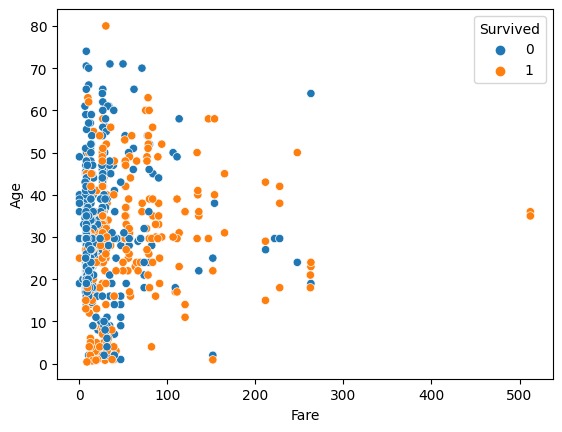

In [50]:
sns.scatterplot(data=data,x='Fare',y='Age',hue='Survived')

<AxesSubplot: xlabel='Age', ylabel='Fare'>

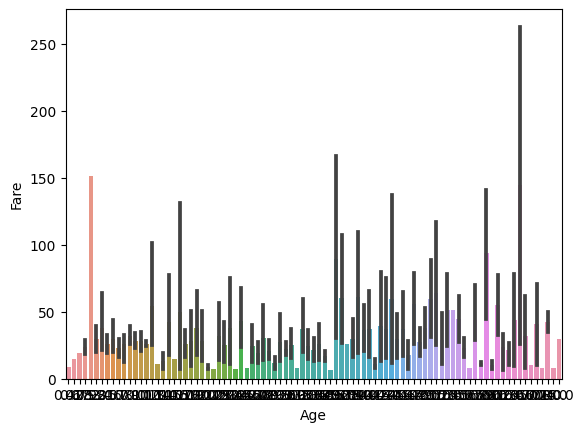

In [51]:
sns.barplot(data=data,x='Age',y='Fare')

In [52]:

#spilliting the data
from sklearn.model_selection import train_test_split
data = pd.get_dummies(data, columns=["Embarked","Sex"])
x = data.drop('Survived',axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [53]:
# socre of diifrent metrices for the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Train the Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
y_probs = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(roc_auc)
precision = precision_score(y_test, y_pred)
print(precision)
f1 = f1_score(y_test, y_pred)
print(f1)

0.8146067415730337
0.853154821250534
0.696969696969697
0.7360000000000001


In [54]:
# 5 flod validation for Naive Bayes classifier
from sklearn. model_selection import cross_val_score
#performing 5-fold cross validation
# we can perform the k fold validation by just giving any other number to k in
from sklearn.model_selection import KFold
# Initialize the KFold splitter
kf = KFold(n_splits=5, shuffle=True, random_state=5)
accuracy = cross_val_score(clf,x,y,cv=kf)
print(accuracy)
meanacc = accuracy.mean()
print(meanacc)

[0.81460674 0.78089888 0.80337079 0.79213483 0.70621469]
0.7794451850441185


In [55]:
#computing probability of each row of test data of top class
probab = clf.predict_proba(X_test)
top_class = []
for i in probab:
  top_class.append(max(i))
print(top_class)

[0.99282568708291, 0.9934231357050285, 0.9818617764431882, 0.9936567588908445, 0.991532304885089, 0.9451646948231555, 0.997143733863047, 0.7728838488453672, 0.9187476018326424, 0.9927516106322837, 0.8605652217057435, 0.9199077721085531, 0.9919845198409171, 0.995025292864146, 0.9935446501379019, 0.9122683659883167, 0.999993284027919, 0.9928568719362229, 0.9509036657391826, 0.9833226265148755, 0.9925256764205297, 0.9175147930165416, 0.9954914715018012, 0.9935702041721862, 0.8644798007499643, 0.996621522614345, 1.0, 0.939752187779808, 0.9921833408881507, 0.9891645149238686, 0.9875855153456495, 0.5711943180226446, 0.9756515095429685, 0.9062905055168097, 0.9083180195759583, 0.9942770923495, 0.935553785449086, 0.9213600963979183, 0.9921885908271065, 0.7581490949534003, 0.9844129177525187, 0.9302957456653299, 0.9925413949431486, 0.9938332670500852, 0.9929113802378144, 0.9935327247933785, 0.9298275528391311, 0.8123615876423685, 0.9653485033388479, 0.9987904070782381, 0.9931324128748396, 0.9933

<AxesSubplot: xlabel='Age', ylabel='Fare'>

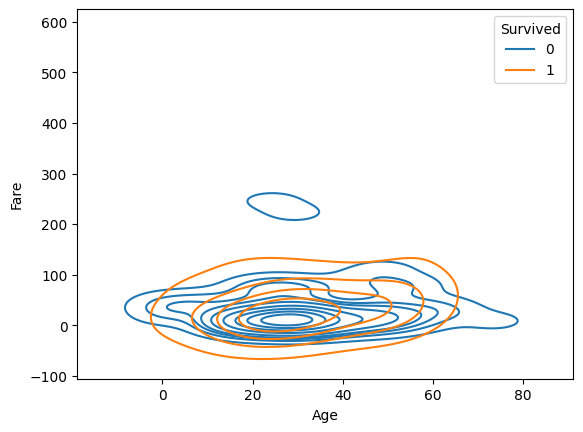

In [56]:
#plotting the contour plots for the three features
sns.kdeplot(x=X_test['Age'],y=X_test['Fare'],hue=y_test)

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

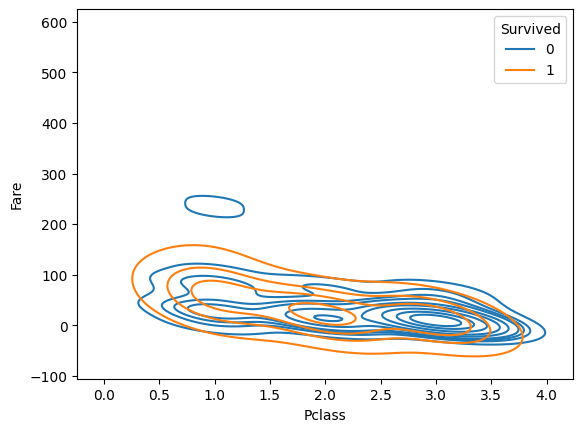

In [57]:
sns.kdeplot(x=X_test['Pclass'],y=X_test['Fare'],hue=y_test)

<AxesSubplot: xlabel='Age', ylabel='Pclass'>

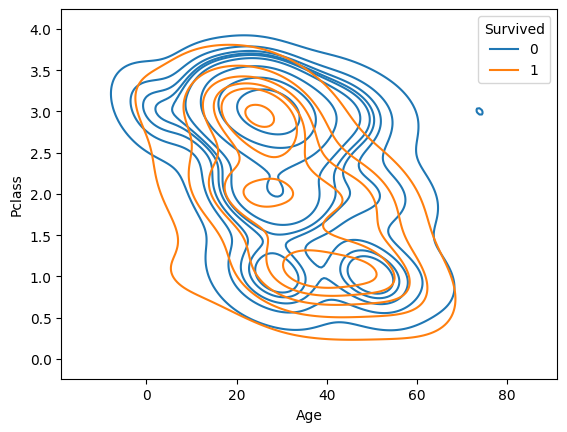

In [58]:
sns.kdeplot(x=X_test['Age'],y=X_test['Pclass'],hue=y_test)

In [59]:
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier()
tree_1.fit(X_train,y_train)


DecisionTreeClassifier()

In [60]:
# performing 5 fold validtion for Decision Tree classifier
from sklearn. model_selection import cross_val_score
#performing 5-fold cross validation
# we can perform the k fold validation by just giving any other number to k in
from sklearn.model_selection import KFold
# Initialize the KFold splitter
kf = KFold(n_splits=5, shuffle=True, random_state=5)
accuracy = cross_val_score(tree_1,x,y,cv=kf)
print(accuracy)
meanacc = accuracy.mean()
print(meanacc)

[0.8258427  0.81460674 0.79213483 0.74719101 0.76836158]
0.7896273725639562


## Question 2


In [61]:
dt = pd.read_csv('dataset (1).csv')
dt

,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


<AxesSubplot: xlabel='X0', ylabel='Count'>

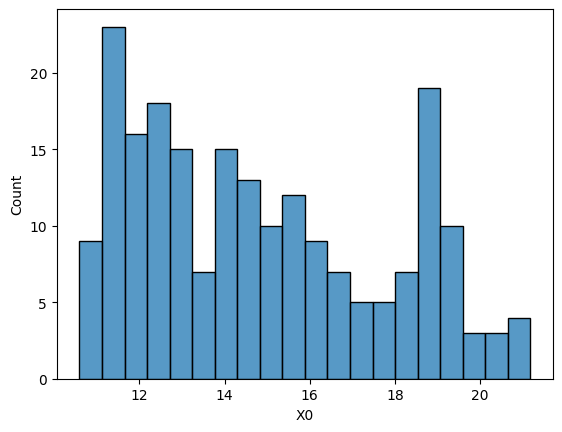

In [62]:
# plotting all features as histogram
sns.histplot(dt['X0'],bins=20)

<AxesSubplot: xlabel='X1', ylabel='Count'>

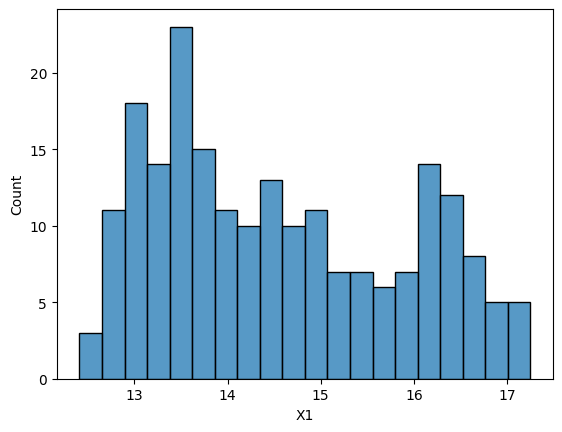

In [63]:
sns.histplot(dt['X1'],bins=20)

<AxesSubplot: xlabel='X2', ylabel='Count'>

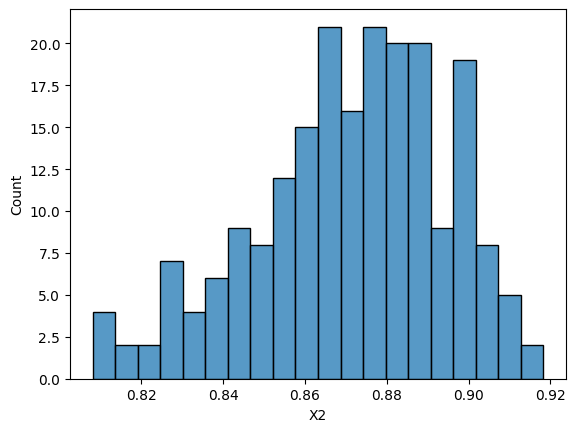

In [64]:
sns.histplot(dt['X2'],bins=20)

<AxesSubplot: xlabel='X3', ylabel='Count'>

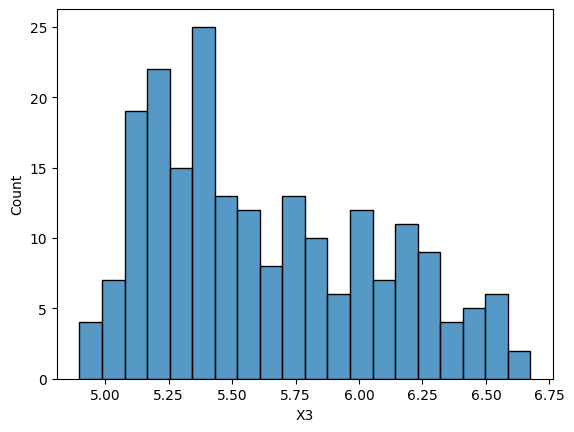

In [65]:
sns.histplot(dt['X3'],bins=20)

<AxesSubplot: xlabel='X4', ylabel='Count'>

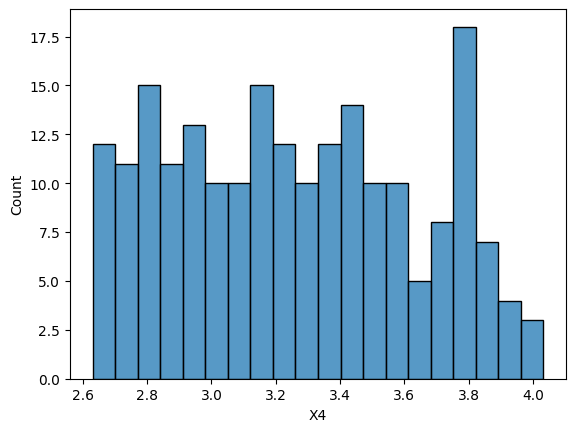

In [66]:
sns.histplot(dt['X4'],bins=20)

<AxesSubplot: xlabel='X5', ylabel='Count'>

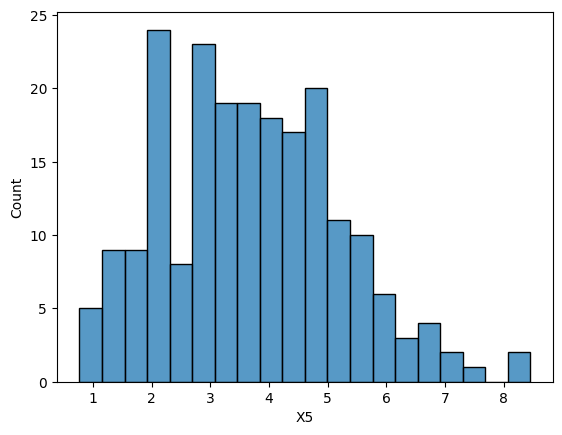

In [67]:
sns.histplot(dt['X5'],bins=20)

<AxesSubplot: xlabel='X6', ylabel='Count'>

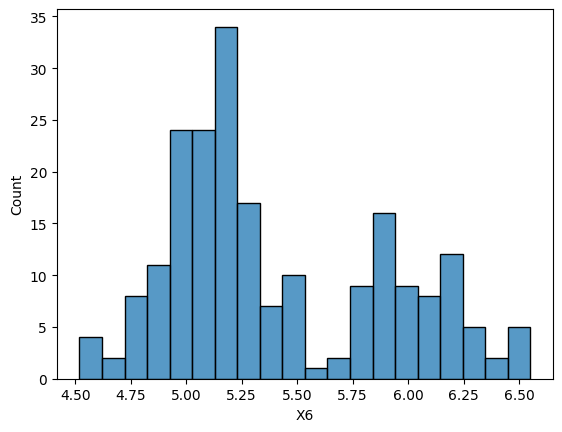

In [68]:
sns.histplot(dt['X6'],bins=20)

In [69]:
# Calculating the prior probablity of each class
count1=dt['Y'].value_counts()[1]
count2=dt['Y'].value_counts()[2]
count3=dt['Y'].value_counts()[3]
total = 210
prior_porb1 = count1/total
prior_porb2 = count2/total
prior_porb3 = count3/total
print(prior_porb1)
print(prior_porb2)
print(prior_porb3)


0.3333333333333333
0.3333333333333333
0.3333333333333333


In [70]:
# functions to discretize the data
def discretization(num_bins,data):
  min_val = min(data)
  max_val = max(data)
  bin_width = (max_val - min_val) / num_bins
  bins = []
  for i in range(num_bins):
      bins.append(min_val + (i + 1) * bin_width)
  discretized_data = []
  for val in data:
      for i in range(len(bins)):
          if val <= bins[i]:
              discretized_data.append(i)
              break
  return discretized_data
X_0=discretization(5,dt['X0'])
X_1=discretization(5,dt['X1'])
X_2=discretization(5,dt['X2'])
X_3=discretization(5,dt['X3'])
X_4=discretization(5,dt['X4'])
X_5=discretization(5,dt['X5'])
X_6=discretization(5,dt['X6'])
#plotting the data discrete data now
print(X_0)
print(X_1)
print(X_2)
print(X_3)
print(X_4)
print(X_5)
print(X_6)
df = pd.DataFrame(X_0,columns=['X_0'])
df['X_1'] = X_1
df['X_2'] = X_2
df['X_3'] = X_3
df['X_4'] = X_4
df['X_5'] = X_5
df['X_6'] = X_6
df['Y'] =dt['Y']
df

[2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 4, 2, 2, 3, 4, 3, 3, 2, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 3, 3, 2, 4, 3, 3, 3, 2, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 4, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[2, 2, 1, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 2, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3,

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,Y
0,2,2,2,2,2,0,1,1
1,2,2,3,1,2,0,1,1
2,1,1,4,1,2,1,0,1
3,1,1,3,1,2,0,0,1
4,2,2,4,2,3,0,1,1
...,...,...,...,...,...,...,...,...
205,0,0,3,0,1,1,0,3
206,0,0,1,0,0,2,1,3
207,1,1,3,0,2,4,1,3
208,0,0,1,0,0,1,1,3


(array([66.,  0., 50.,  0.,  0., 38.,  0., 36.,  0., 20.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

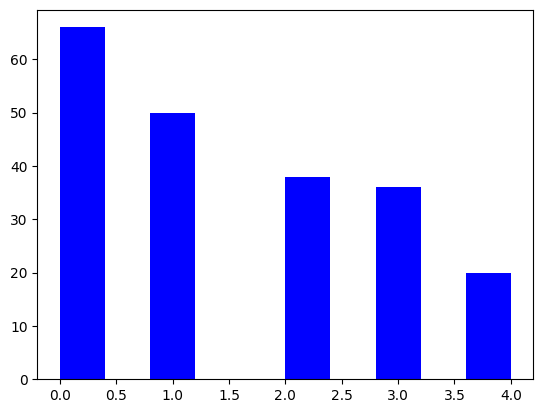

In [71]:
plt.hist(X_0,color='blue')

(array([46.,  0., 59.,  0.,  0., 41.,  0., 34.,  0., 30.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

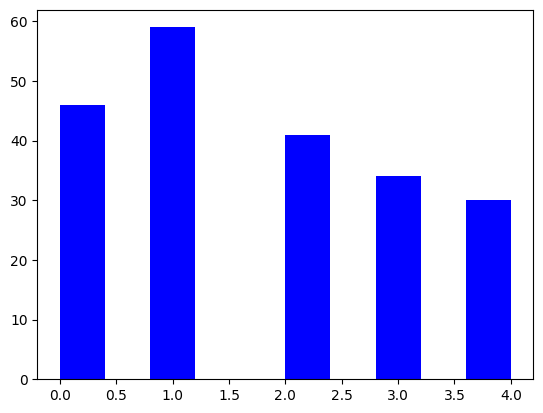

In [72]:
plt.hist(X_1,color='blue')

(array([15.,  0., 27.,  0.,  0., 64.,  0., 70.,  0., 34.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

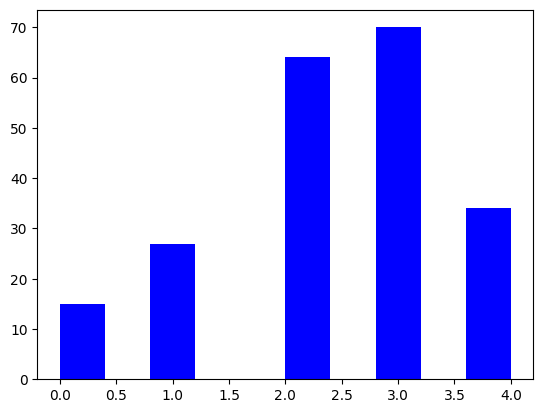

In [73]:
plt.hist(X_2,color='blue')

(array([52.,  0., 65.,  0.,  0., 37.,  0., 39.,  0., 17.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

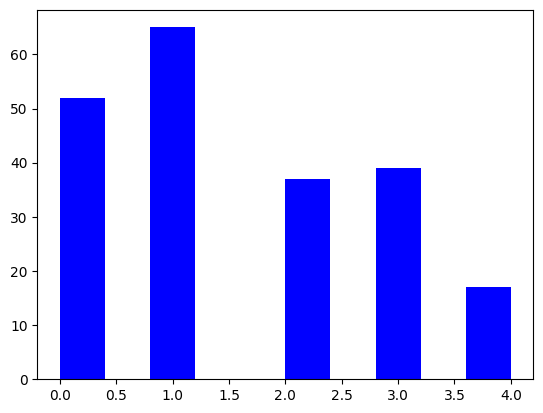

In [74]:
plt.hist(X_3,color='blue')

(array([49.,  0., 48.,  0.,  0., 48.,  0., 33.,  0., 32.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

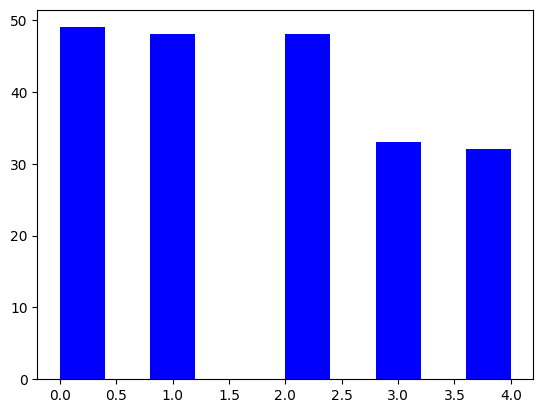

In [75]:
plt.hist(X_4,color='blue')

(array([47.,  0., 69.,  0.,  0., 66.,  0., 23.,  0.,  5.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

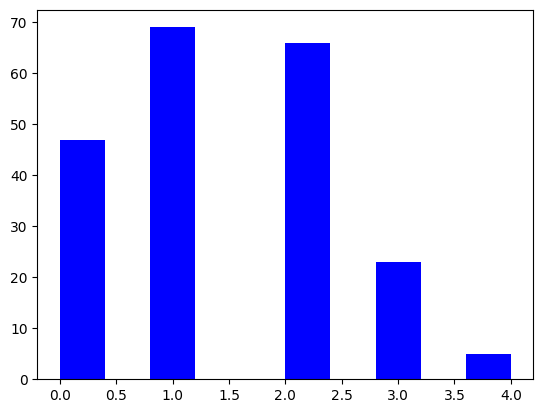

In [76]:
plt.hist(X_5,color='blue')

(array([25.,  0., 99.,  0.,  0., 20.,  0., 42.,  0., 24.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

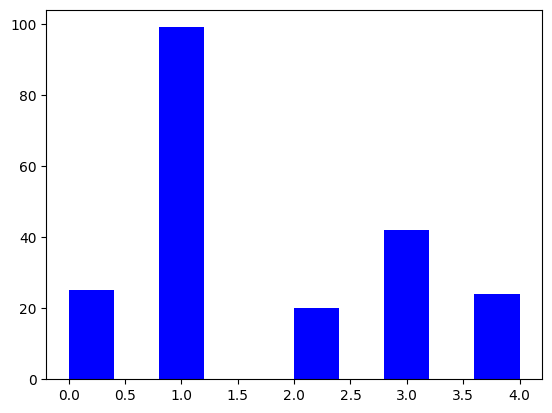

In [77]:
plt.hist(X_6,color='blue')

In [78]:
y1 = df['Y'].to_numpy()
print(y1)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [79]:
# the likelihood/class conditional probabilities
def countofxandy(x,y,bin,cls):
  count = 0
  for i in range(len(x)):
      if(x[i]==bin and y[i]==cls):
        count+=1
  return count
def lihood(x,y,bin,cls,ct_cls):
  p=(countofxandy(x,y,bin,cls))/ct_cls
  return p
clss1 = []
clss2 = []
clss3 = []
for i in range(1,4):
  for j in range(5):
    if(i==1):
      p = lihood(X_0,y1,i,j,70)*lihood(X_1,y1,i,j,70)*lihood(X_2,y1,i,j,70)*lihood(X_3,y1,i,j,70)*lihood(X_4,y1,i,j,70)*lihood(X_5,y1,i,j,70)*lihood(X_6,y1,i,j,70)
      clss1.append(p)
    if(i==2):
      p = lihood(X_0,y1,i,j,70)*lihood(X_1,y1,i,j,70)*lihood(X_2,y1,i,j,70)*lihood(X_3,y1,i,j,70)*lihood(X_4,y1,i,j,70)*lihood(X_5,y1,i,j,70)*lihood(X_6,y1,i,j,70)
      clss2.append(p)
    if(i==3):
      p = lihood(X_0,y1,i,j,70)*lihood(X_1,y1,i,j,70)*lihood(X_2,y1,i,j,70)*lihood(X_3,y1,i,j,70)*lihood(X_4,y1,i,j,70)*lihood(X_5,y1,i,j,70)*lihood(X_6,y1,i,j,70)
      clss3.append(p)
print(clss1)
print(clss2)
print(clss3)


[0.0, 0.0002989819292981666, 0.0, 0.0002965370143392634, 0.0]
[0.0, 0.00019907157246191147, 3.3005489695134308e-06, 0.0, 0.0]
[0.0, 9.03413665103097e-11, 0.000886736648845294, 0.0, 0.0]


<AxesSubplot: xlabel='X_0', ylabel='count'>

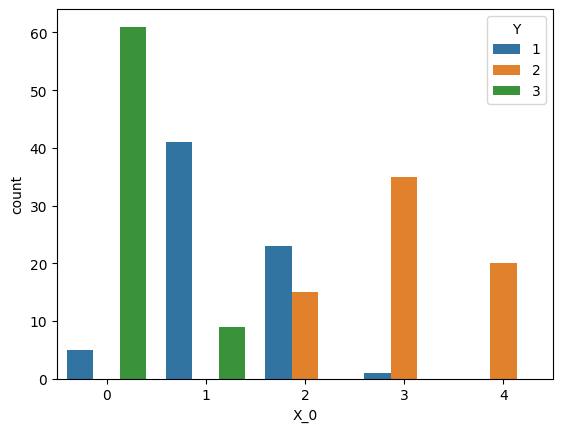

In [80]:
sns.countplot(data=df,x='X_0',hue='Y')

<AxesSubplot: xlabel='X_1', ylabel='count'>

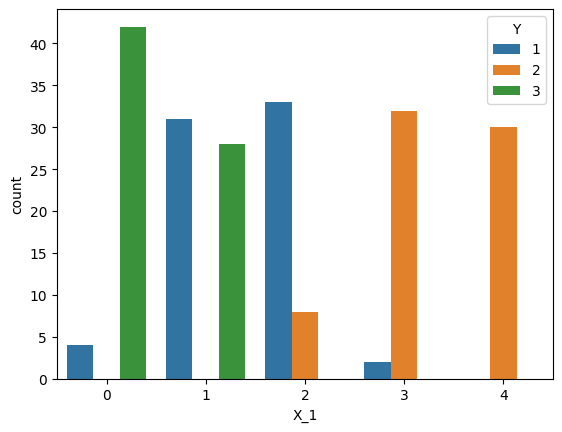

In [81]:
sns.countplot(data=df,x='X_1',hue='Y')

<AxesSubplot: xlabel='X_2', ylabel='count'>

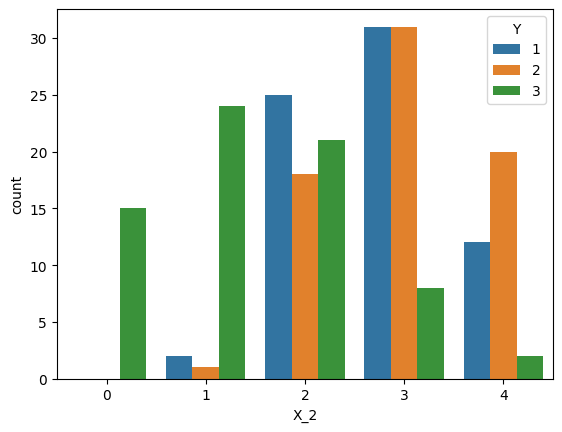

In [82]:
sns.countplot(data=df,x='X_2',hue='Y')

<AxesSubplot: xlabel='X_3', ylabel='count'>

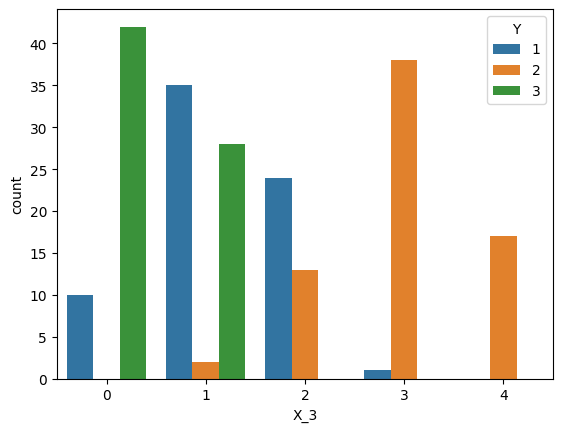

In [83]:
sns.countplot(data=df,x='X_3',hue='Y')

<AxesSubplot: xlabel='X_4', ylabel='count'>

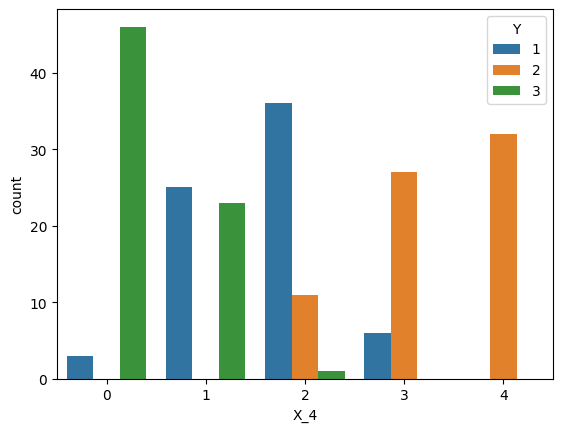

In [84]:
sns.countplot(data=df,x='X_4',hue='Y')

<AxesSubplot: xlabel='X_5', ylabel='count'>

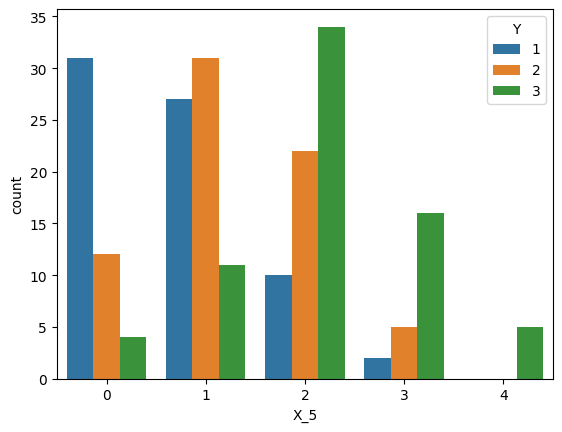

In [85]:
sns.countplot(data=df,x='X_5',hue='Y')

<AxesSubplot: xlabel='X_6', ylabel='count'>

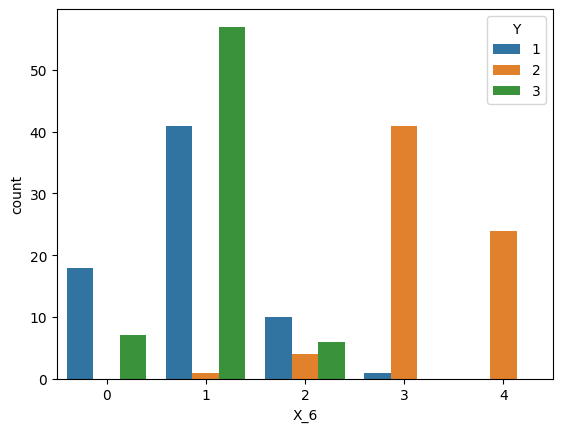

In [86]:
sns.countplot(data=df,x='X_6',hue='Y')

In [87]:
#posterior = likelihood*prior/evidence
# if we consider them as independent evidence = 1/7 and prior = 1/3
for i in range(5):
  clss1[i] = (clss1[i]*7)/3
  clss2[i] = (clss2[i]*7)/3
  clss3[i] = (clss3[i]*7)/3
print(clss1)
print(clss2)
print(clss3)



[0.0, 0.0006976245016957222, 0.0, 0.000691919700124948, 0.0]
[0.0, 0.0004645003357444601, 7.701280928864672e-06, 0.0, 0.0]
[0.0, 2.1079652185738931e-10, 0.002069052180639019, 0.0, 0.0]


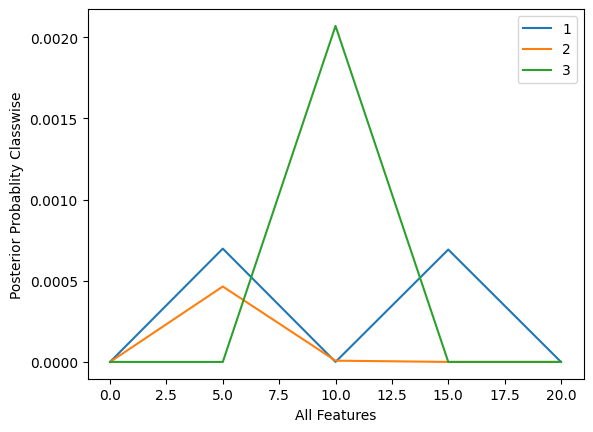

In [88]:
#because maximum range of all features is from 0 to 20 that's why we are using linspace range form 0 to 20 and bins = 5 thats why bins =5
plt.plot(np.linspace(0,20,5),clss1,label='1')
#here 1 is representing class 1
plt.plot(np.linspace(0,20,5),clss2,label='2')
#here 2 is representing class 2
plt.plot(np.linspace(0,20,5),clss3,label='3')
# here 3 is representing class 3
plt.legend()
plt.xlabel('All Features')
plt.ylabel('Posterior Probablity Classwise')
plt.show()